# Assignment- Linear Regression


## Car Pricing Study


#### Problem Statement:

A Chinese automobile company Geely Auto aspires to enter the US market by setting up their manufacturing unit there and producing cars locally to give competition to their US and European counterparts. They have contracted an automobile consulting company to understand the factors on which the pricing of cars depends. Specifically, they want to understand the factors affecting the pricing of cars in the American market, since those may be very different from the Chinese market. The company wants to know:

-Which variables are significant in predicting the price of a car

-How well those variables describe the price of a car

Based on various market surveys, the consulting firm has gathered a large dataset of different types of cars across the Americal market. 

# Step 1: Reading and Understanding the Data

In [1]:
# Supress Warnings

import warnings
warnings.filterwarnings('ignore')

In [2]:
import numpy as np
import pandas as pd

# define the header for the dataset
headers = ["car_ID", "symboling","fueltype", "aspiration",
           "doornumber", "carbody", "drivewheel", "enginelocation",
           "wheelbase", "carlength", "carwidth", "carheight", "curbweight",
           "enginetype", "cylindernumber", "enginesize", "fuelsystem",
           "boreratio", "stroke", "compressionratio", "horsepower", "peakrpm",
           "citympg", "highwaympg", "price"]


In [3]:
car_pricing=pd.read_csv('C:\DataScienceUpgrad\Main Course\Course 3-Machine Learning I\Module 2-Assignment\CarPrice_Assignment.csv')

In [4]:
# check the head of dataset
car_pricing.head()

,car_ID,symboling,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,...,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
0,1,3,alfa-romero giulia,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495.0
1,2,3,alfa-romero stelvio,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500.0
2,3,1,alfa-romero Quadrifoglio,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500.0
3,4,2,audi 100 ls,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950.0
4,5,2,audi 100ls,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450.0


In [5]:
# set car_ID as index 
car_pricing.set_index('car_ID', drop=True, inplace=True)
car_pricing.head()

,symboling,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,carlength,...,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
car_ID,,,,,,,,,,,,,,,,,,,,,
1,3,alfa-romero giulia,gas,std,two,convertible,rwd,front,88.6,168.8,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495.0
2,3,alfa-romero stelvio,gas,std,two,convertible,rwd,front,88.6,168.8,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500.0
3,1,alfa-romero Quadrifoglio,gas,std,two,hatchback,rwd,front,94.5,171.2,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500.0
4,2,audi 100 ls,gas,std,four,sedan,fwd,front,99.8,176.6,...,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950.0
5,2,audi 100ls,gas,std,four,sedan,4wd,front,99.4,176.6,...,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450.0


Inspect the various aspects of the car_pricing dataframe

In [6]:
car_pricing.shape

(205, 25)

In [7]:
car_pricing.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 205 entries, 1 to 205
Data columns (total 25 columns):
symboling           205 non-null int64
CarName             205 non-null object
fueltype            205 non-null object
aspiration          205 non-null object
doornumber          205 non-null object
carbody             205 non-null object
drivewheel          205 non-null object
enginelocation      205 non-null object
wheelbase           205 non-null float64
carlength           205 non-null float64
carwidth            205 non-null float64
carheight           205 non-null float64
curbweight          205 non-null int64
enginetype          205 non-null object
cylindernumber      205 non-null object
enginesize          205 non-null int64
fuelsystem          205 non-null object
boreratio           205 non-null float64
stroke              205 non-null float64
compressionratio    205 non-null float64
horsepower          205 non-null int64
peakrpm             205 non-null int64
citympg      

no missing values in any column


In [8]:
# now checking duplicates row
duplicateRowsDF = car_pricing[car_pricing.duplicated()]
duplicateRowsDF

,symboling,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,carlength,...,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
car_ID,,,,,,,,,,,,,,,,,,,,,


no duplicate rows present

In [9]:
car_pricing.describe()

,symboling,wheelbase,carlength,carwidth,carheight,curbweight,enginesize,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
count,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000
mean,0.834146,98.756585,174.049268,65.907805,53.724878,2555.565854,126.907317,3.329756,3.255415,10.142537,104.117073,5125.121951,25.219512,30.751220,13276.710571
std,1.245307,6.021776,12.337289,2.145204,2.443522,520.680204,41.642693,0.270844,0.313597,3.972040,39.544167,476.985643,6.542142,6.886443,7988.852332
min,-2.000000,86.600000,141.100000,60.300000,47.800000,1488.000000,61.000000,2.540000,2.070000,7.000000,48.000000,4150.000000,13.000000,16.000000,5118.000000
25%,0.000000,94.500000,166.300000,64.100000,52.000000,2145.000000,97.000000,3.150000,3.110000,8.600000,70.000000,4800.000000,19.000000,25.000000,7788.000000
50%,1.000000,97.000000,173.200000,65.500000,54.100000,2414.000000,120.000000,3.310000,3.290000,9.000000,95.000000,5200.000000,24.000000,30.000000,10295.000000
75%,2.000000,102.400000,183.100000,66.900000,55.500000,2935.000000,141.000000,3.580000,3.410000,9.400000,116.000000,5500.000000,30.000000,34.000000,16503.000000
max,3.000000,120.900000,208.100000,72.300000,59.800000,4066.000000,326.000000,3.940000,4.170000,23.000000,288.000000,6600.000000,49.000000,54.000000,45400.000000


# Step 2: Visualising the Data

In [10]:
import matplotlib.pyplot as plt
import seaborn as sns

#### Visualising Numeric Variables

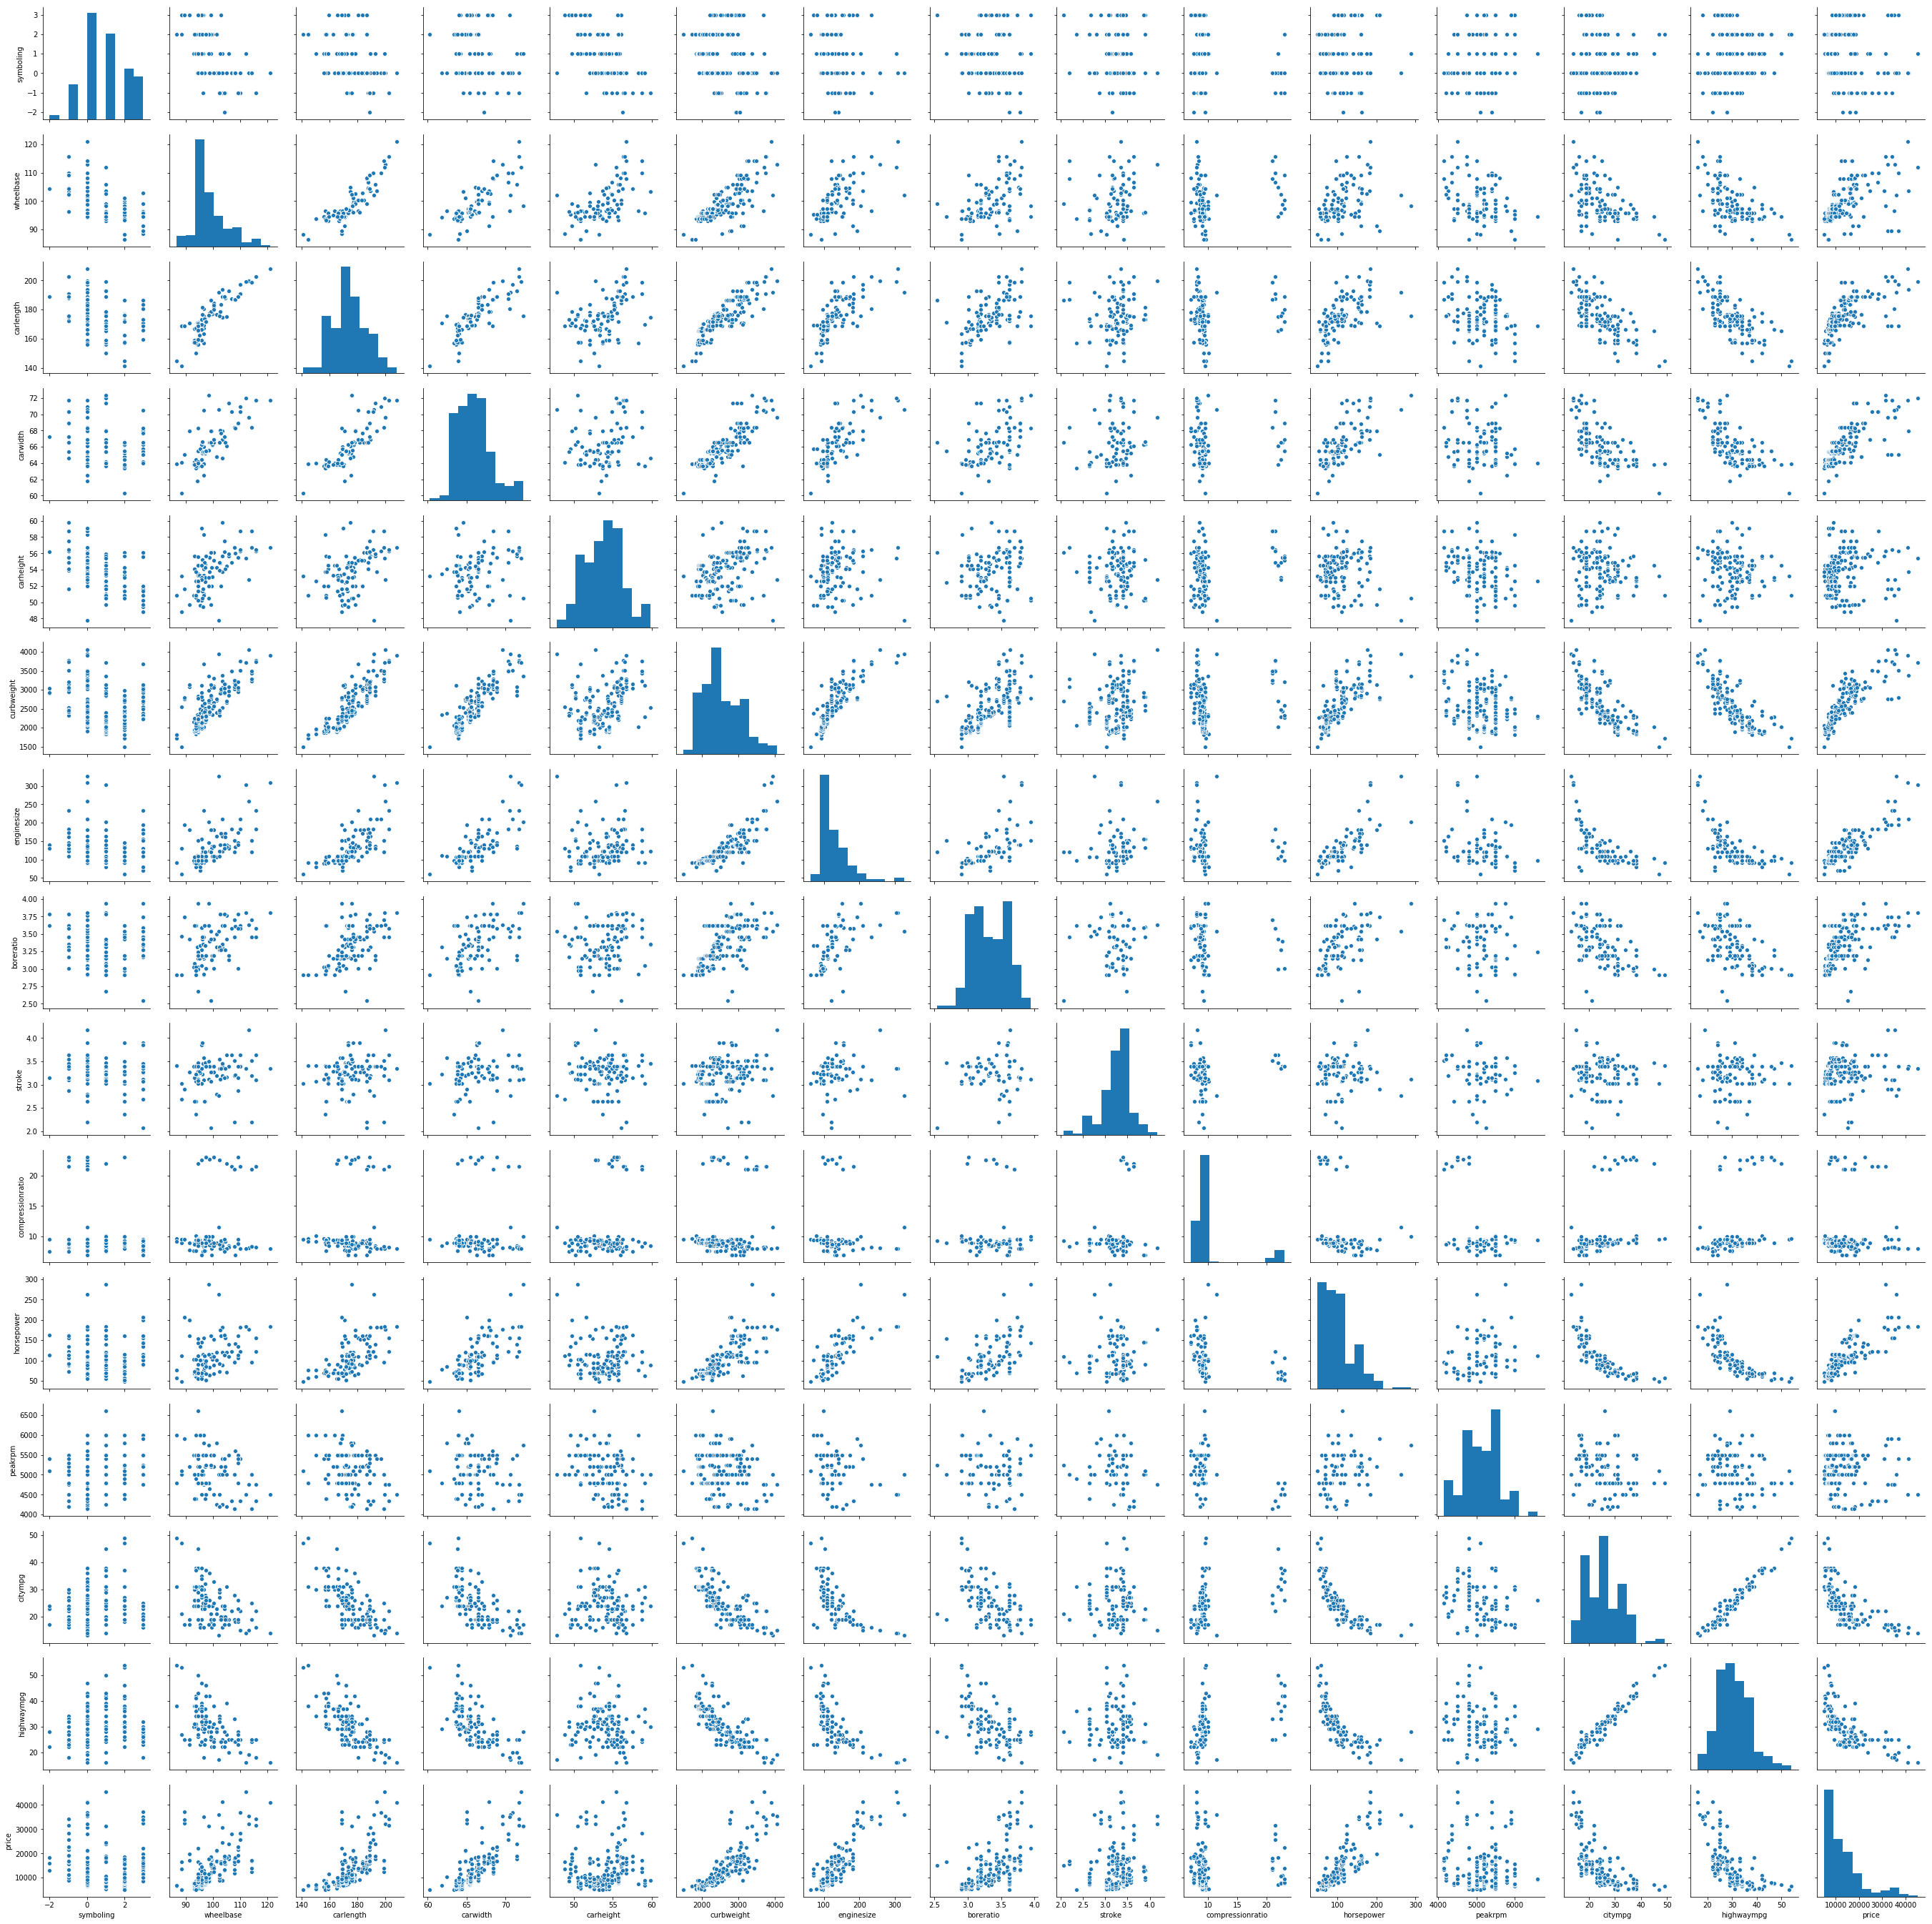

In [11]:
sns.pairplot(car_pricing)
plt.show()

price variable has linear relationship with many variables like wheelbase,carlength,carwidth,curbweight,enginesize,horsepower etc so linear regression model can be used for modelling of this dataset.

#### Visualising Categorical Variables
there are a few categorical variables. Let's make a boxplot for some of these variables ().

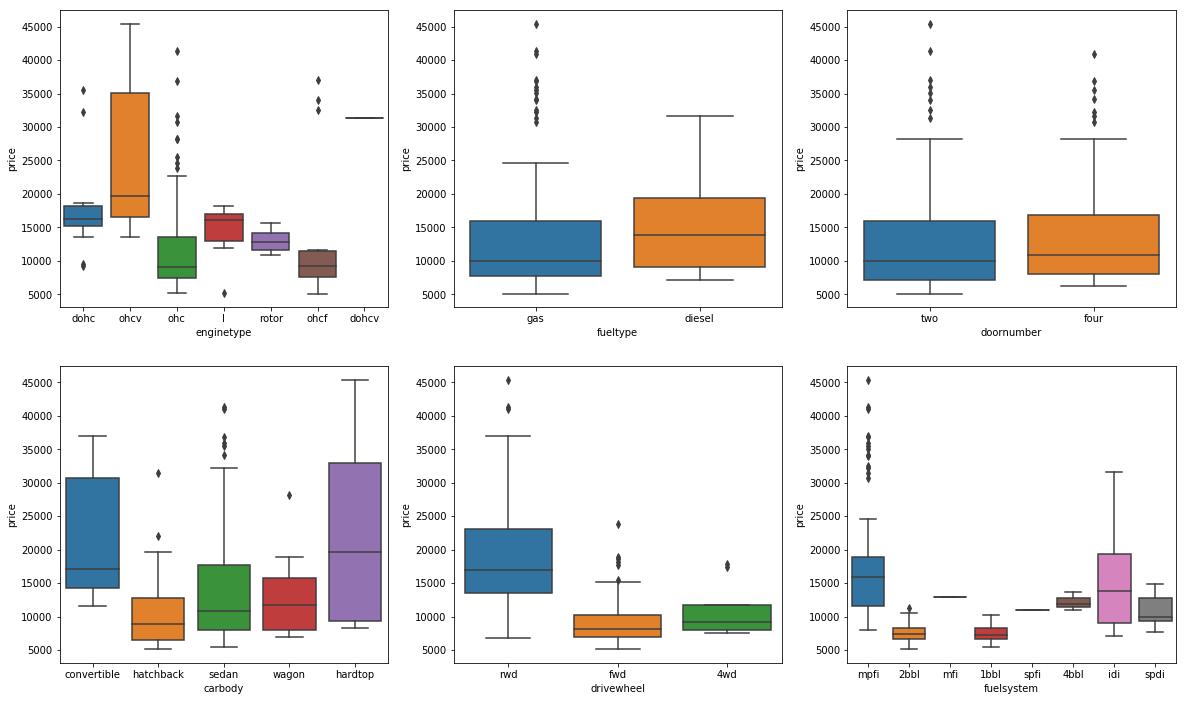

In [12]:
plt.figure(figsize=(20, 12))
plt.subplot(2,3,1)
sns.boxplot(x = 'enginetype', y = 'price', data = car_pricing)
plt.subplot(2,3,2)
sns.boxplot(x = 'fueltype', y = 'price', data = car_pricing)
plt.subplot(2,3,3)
sns.boxplot(x = 'doornumber', y = 'price', data = car_pricing)
plt.subplot(2,3,4)
sns.boxplot(x = 'carbody', y = 'price', data = car_pricing)
plt.subplot(2,3,5)
sns.boxplot(x = 'drivewheel', y = 'price', data = car_pricing)
plt.subplot(2,3,6)
sns.boxplot(x = 'fuelsystem', y = 'price', data = car_pricing)
plt.show()

# Step 3: Data Cleaning & Data Preparation

In [13]:
#  extract value of company from car Name and create a new column for that

# create new data frame with split value column 
new = car_pricing["CarName"].str.split(" ", n = 1, expand = True) 
  
# making separate car company column from new data frame 
car_pricing["CarCompany"]= new[0] 

# Dropping old CarName column 
car_pricing.drop(columns =["CarName"], inplace = True) 
  
# df display 
car_pricing.head()

,symboling,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,carlength,carwidth,...,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price,CarCompany
car_ID,,,,,,,,,,,,,,,,,,,,,
1,3,gas,std,two,convertible,rwd,front,88.6,168.8,64.1,...,mpfi,3.47,2.68,9.0,111,5000,21,27,13495.0,alfa-romero
2,3,gas,std,two,convertible,rwd,front,88.6,168.8,64.1,...,mpfi,3.47,2.68,9.0,111,5000,21,27,16500.0,alfa-romero
3,1,gas,std,two,hatchback,rwd,front,94.5,171.2,65.5,...,mpfi,2.68,3.47,9.0,154,5000,19,26,16500.0,alfa-romero
4,2,gas,std,four,sedan,fwd,front,99.8,176.6,66.2,...,mpfi,3.19,3.40,10.0,102,5500,24,30,13950.0,audi
5,2,gas,std,four,sedan,4wd,front,99.4,176.6,66.4,...,mpfi,3.19,3.40,8.0,115,5500,18,22,17450.0,audi


In [14]:
# checking various categories of CarCompany
car_pricing['CarCompany'].value_counts()


toyota         31
nissan         17
mazda          15
honda          13
mitsubishi     13
subaru         12
volvo          11
peugeot        11
dodge           9
volkswagen      9
buick           8
bmw             8
audi            7
plymouth        7
saab            6
isuzu           4
porsche         4
chevrolet       3
jaguar          3
alfa-romero     3
vw              2
renault         2
maxda           2
Nissan          1
vokswagen       1
mercury         1
toyouta         1
porcshce        1
Name: CarCompany, dtype: int64

In [15]:
# there are some categories which are redundant as they are spelt different at few places. Lets correct them

# defining a dictionary to replace wrong spelt carcompany with correct one

car_company_dict={'toyouta': 'toyota', 'Nissan': 'nissan','vw':'volkswagen','porcshce':'porsche','vokswagen':'volkswagen','maxda':'mazda'}

# replace the incorrect name with correct one

car_pricing['CarCompany']=car_pricing['CarCompany'].replace(car_company_dict)

car_pricing['CarCompany'].value_counts()





toyota         32
nissan         18
mazda          17
honda          13
mitsubishi     13
subaru         12
volkswagen     12
peugeot        11
volvo          11
dodge           9
bmw             8
buick           8
plymouth        7
audi            7
saab            6
porsche         5
isuzu           4
jaguar          3
chevrolet       3
alfa-romero     3
renault         2
mercury         1
Name: CarCompany, dtype: int64

In [16]:
# checking distinct categories in other categorical columns
other_cat_col=['fueltype','aspiration','carbody','drivewheel','enginelocation','enginetype','fuelsystem']
for col in other_cat_col:
    print(car_pricing[col].value_counts())




gas       185
diesel     20
Name: fueltype, dtype: int64
std      168
turbo     37
Name: aspiration, dtype: int64
sedan          96
hatchback      70
wagon          25
hardtop         8
convertible     6
Name: carbody, dtype: int64
fwd    120
rwd     76
4wd      9
Name: drivewheel, dtype: int64
front    202
rear       3
Name: enginelocation, dtype: int64
ohc      148
ohcf      15
ohcv      13
l         12
dohc      12
rotor      4
dohcv      1
Name: enginetype, dtype: int64
mpfi    94
2bbl    66
idi     20
1bbl    11
spdi     9
4bbl     3
mfi      1
spfi     1
Name: fuelsystem, dtype: int64


#### Label encoding for ordered categorical variables

In [17]:
# there are two columns 'doornumber','cylindernumber' where values are used to represent numbers.


print(car_pricing['doornumber'].value_counts())
print(car_pricing['cylindernumber'].value_counts())

four    115
two      90
Name: doornumber, dtype: int64
four      159
six        24
five       11
eight       5
two         4
twelve      1
three       1
Name: cylindernumber, dtype: int64


In [18]:
# list of variables to replace
text_to_num_col=['doornumber','cylindernumber']

# Defining the map function
def num_map(x):
    return x.map({'four': 4, 'two': 2,'six':6,'five':5,'eight':8,'three':3,'twelve':12})

# Applying the function to the housing list
car_pricing[text_to_num_col] = car_pricing[text_to_num_col].apply(num_map)

car_pricing.head()

,symboling,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,carlength,carwidth,...,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price,CarCompany
car_ID,,,,,,,,,,,,,,,,,,,,,
1,3,gas,std,2,convertible,rwd,front,88.6,168.8,64.1,...,mpfi,3.47,2.68,9.0,111,5000,21,27,13495.0,alfa-romero
2,3,gas,std,2,convertible,rwd,front,88.6,168.8,64.1,...,mpfi,3.47,2.68,9.0,111,5000,21,27,16500.0,alfa-romero
3,1,gas,std,2,hatchback,rwd,front,94.5,171.2,65.5,...,mpfi,2.68,3.47,9.0,154,5000,19,26,16500.0,alfa-romero
4,2,gas,std,4,sedan,fwd,front,99.8,176.6,66.2,...,mpfi,3.19,3.40,10.0,102,5500,24,30,13950.0,audi
5,2,gas,std,4,sedan,4wd,front,99.4,176.6,66.4,...,mpfi,3.19,3.40,8.0,115,5500,18,22,17450.0,audi


#### Dummy variables for unordered categorical variables

In [19]:
# Get the dummy variables for the categorical features and store it in a new variable - 'dummy'
categorical_feature=['CarCompany','fueltype','aspiration','carbody','drivewheel','enginelocation','enginetype','fuelsystem']
dummy = pd.get_dummies(car_pricing[categorical_feature], drop_first = True)

# Add the results to the original car_pricing dataframe
car_pricing = pd.concat([car_pricing, dummy], axis = 1)

# Check what the dataset 'status' looks like
car_pricing.head()

,symboling,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,carlength,carwidth,...,enginetype_ohcf,enginetype_ohcv,enginetype_rotor,fuelsystem_2bbl,fuelsystem_4bbl,fuelsystem_idi,fuelsystem_mfi,fuelsystem_mpfi,fuelsystem_spdi,fuelsystem_spfi
car_ID,,,,,,,,,,,,,,,,,,,,,
1,3,gas,std,2,convertible,rwd,front,88.6,168.8,64.1,...,0,0,0,0,0,0,0,1,0,0
2,3,gas,std,2,convertible,rwd,front,88.6,168.8,64.1,...,0,0,0,0,0,0,0,1,0,0
3,1,gas,std,2,hatchback,rwd,front,94.5,171.2,65.5,...,0,1,0,0,0,0,0,1,0,0
4,2,gas,std,4,sedan,fwd,front,99.8,176.6,66.2,...,0,0,0,0,0,0,0,1,0,0
5,2,gas,std,4,sedan,4wd,front,99.4,176.6,66.4,...,0,0,0,0,0,0,0,1,0,0


In [20]:
# Drop original categorical feature as we have created the dummies for it
car_pricing.drop(categorical_feature, axis = 1, inplace = True)

In [21]:
car_pricing.head()

,symboling,doornumber,wheelbase,carlength,carwidth,carheight,curbweight,cylindernumber,enginesize,boreratio,...,enginetype_ohcf,enginetype_ohcv,enginetype_rotor,fuelsystem_2bbl,fuelsystem_4bbl,fuelsystem_idi,fuelsystem_mfi,fuelsystem_mpfi,fuelsystem_spdi,fuelsystem_spfi
car_ID,,,,,,,,,,,,,,,,,,,,,
1,3,2,88.6,168.8,64.1,48.8,2548,4,130,3.47,...,0,0,0,0,0,0,0,1,0,0
2,3,2,88.6,168.8,64.1,48.8,2548,4,130,3.47,...,0,0,0,0,0,0,0,1,0,0
3,1,2,94.5,171.2,65.5,52.4,2823,6,152,2.68,...,0,1,0,0,0,0,0,1,0,0
4,2,4,99.8,176.6,66.2,54.3,2337,4,109,3.19,...,0,0,0,0,0,0,0,1,0,0
5,2,4,99.4,176.6,66.4,54.3,2824,5,136,3.19,...,0,0,0,0,0,0,0,1,0,0


# Splitting the Data into Training and Testing Sets

In [22]:
from sklearn.model_selection import train_test_split
df_train,df_test=train_test_split(car_pricing,train_size=0.7,test_size=0.3,random_state=100)

### Rescaling the Features
using MinMax scaling

In [23]:
from sklearn.preprocessing import MinMaxScaler
scaler=MinMaxScaler()

In [24]:
# Apply scaler() to all the numeric columns except the car_ID and 'dummy' variables
num_vars = ['symboling','wheelbase','doornumber','cylindernumber','carlength','carwidth','carheight','curbweight','enginesize','boreratio','stroke','compressionratio','horsepower','peakrpm','citympg','highwaympg','price']

df_train[num_vars] = scaler.fit_transform(df_train[num_vars])

df_train.head()

C:\Users\gupta\Anaconda3\lib\site-packages\sklearn\preprocessing\data.py:323: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by MinMaxScaler.
  return self.partial_fit(X, y)


,symboling,doornumber,wheelbase,carlength,carwidth,carheight,curbweight,cylindernumber,enginesize,boreratio,...,enginetype_ohcf,enginetype_ohcv,enginetype_rotor,fuelsystem_2bbl,fuelsystem_4bbl,fuelsystem_idi,fuelsystem_mfi,fuelsystem_mpfi,fuelsystem_spdi,fuelsystem_spfi
car_ID,,,,,,,,,,,,,,,,,,,,,
123,0.6,1.0,0.244828,0.426016,0.291667,0.265487,0.272692,0.2,0.139623,0.230159,...,0,0,0,1,0,0,0,0,0,0
126,1.0,0.0,0.272414,0.452033,0.666667,0.212389,0.500388,0.2,0.339623,1.000000,...,0,0,0,0,0,0,0,1,0,0
167,0.6,0.0,0.272414,0.448780,0.308333,0.424779,0.314973,0.2,0.139623,0.444444,...,0,0,0,0,0,0,0,1,0,0
2,1.0,0.0,0.068966,0.450407,0.316667,0.088496,0.411171,0.2,0.260377,0.626984,...,0,0,0,0,0,0,0,1,0,0
200,0.2,1.0,0.610345,0.775610,0.575000,0.858407,0.647401,0.2,0.260377,0.746032,...,0,0,0,0,0,0,0,1,0,0


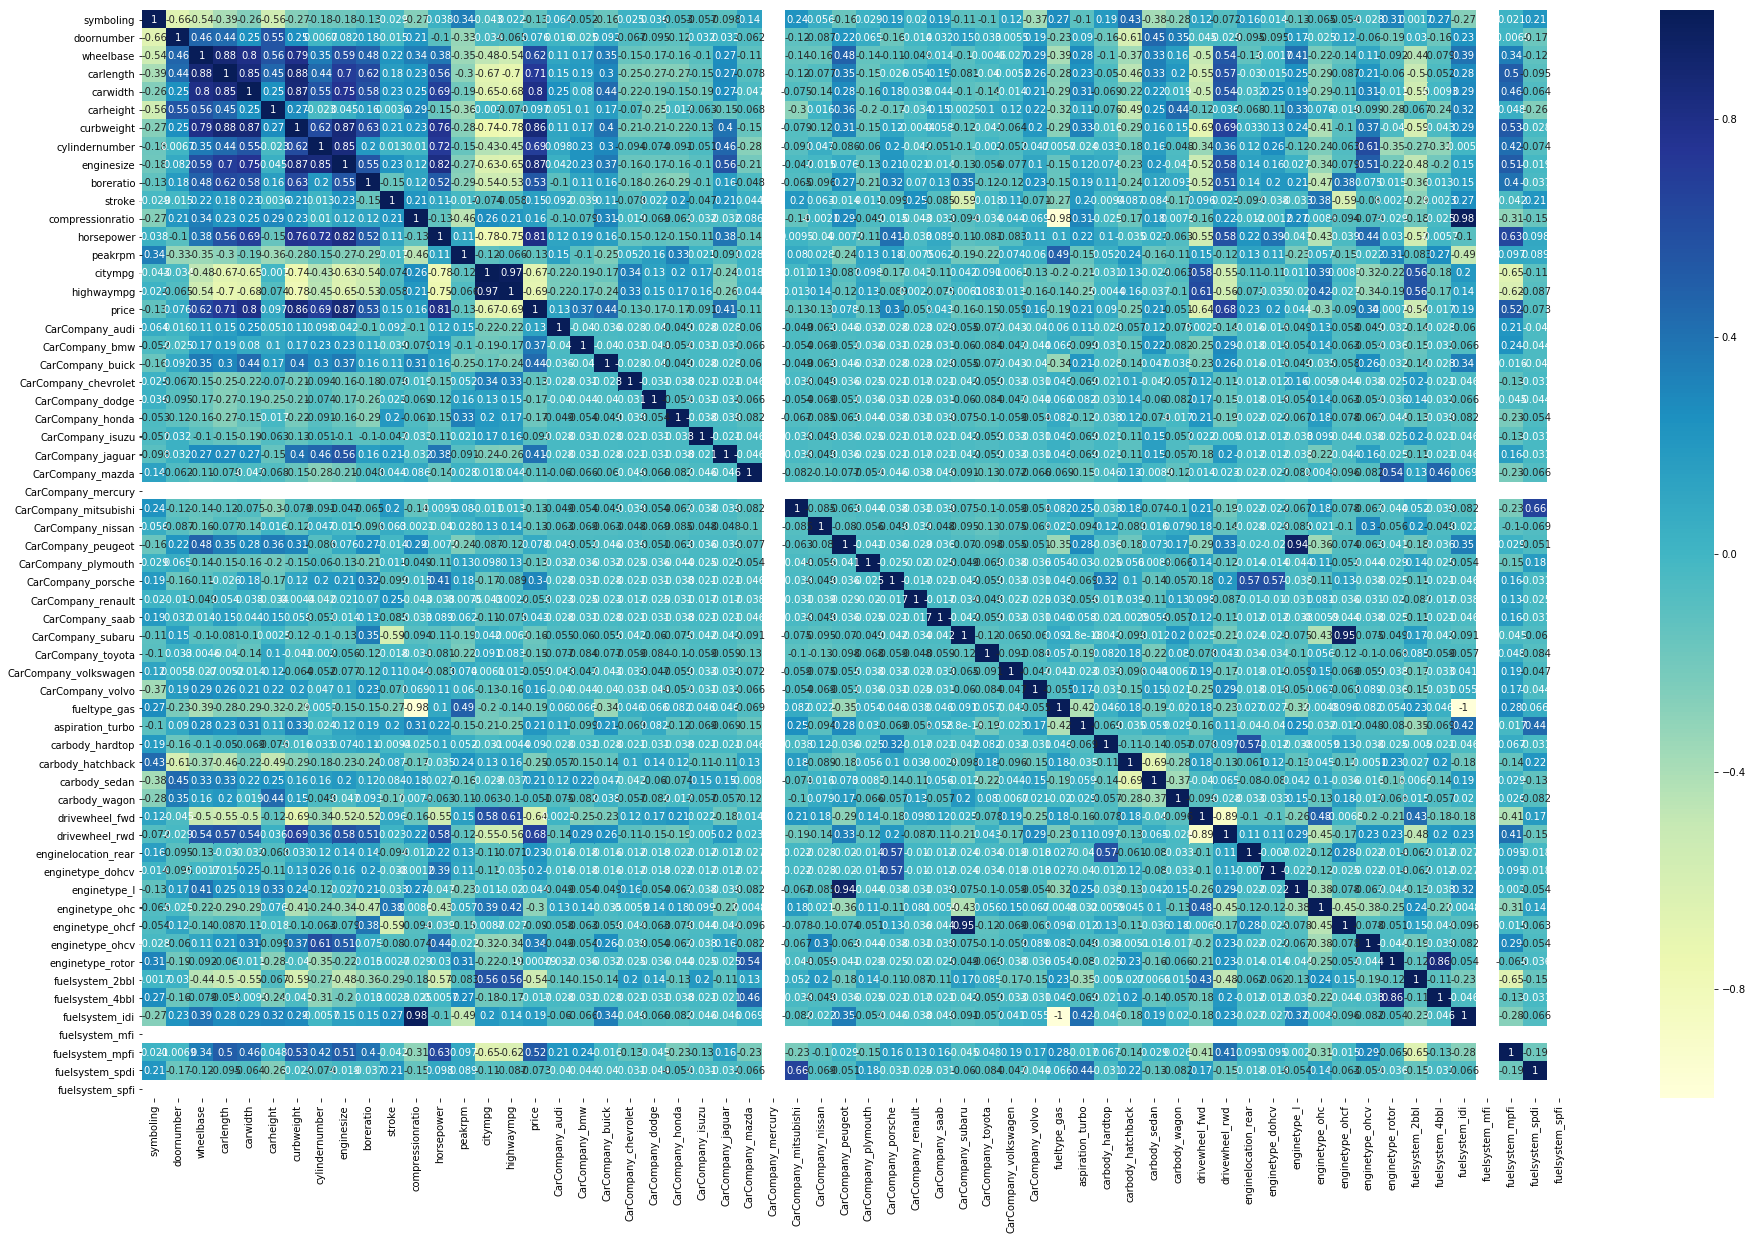

In [25]:
# Let's check the correlation coefficients to see which variables are highly correlated

plt.figure(figsize = (32, 20))
sns.heatmap(df_train.corr(),annot=True, cmap="YlGnBu")
plt.show()

### Dividing into X and Y sets for the model building

In [26]:
y_train=df_train.pop('price')
x_train=df_train

# Building our model

### RFE
Recursive feature elimination

In [27]:
from sklearn.feature_selection import RFE
from sklearn.linear_model import LinearRegression

In [28]:
# Running RFE with the output number of variable equal to 15
lm=LinearRegression()
lm.fit(x_train,y_train)

rfe=RFE(lm,15)
rfe=rfe.fit(x_train,y_train)

In [29]:
list(zip(x_train.columns,rfe.support_,rfe.ranking_))

[('symboling', False, 38),
 ('doornumber', False, 36),
 ('wheelbase', False, 4),
 ('carlength', True, 1),
 ('carwidth', True, 1),
 ('carheight', False, 18),
 ('curbweight', True, 1),
 ('cylindernumber', True, 1),
 ('enginesize', True, 1),
 ('boreratio', True, 1),
 ('stroke', True, 1),
 ('compressionratio', True, 1),
 ('horsepower', False, 13),
 ('peakrpm', True, 1),
 ('citympg', False, 6),
 ('highwaympg', False, 26),
 ('CarCompany_audi', False, 28),
 ('CarCompany_bmw', True, 1),
 ('CarCompany_buick', False, 34),
 ('CarCompany_chevrolet', False, 22),
 ('CarCompany_dodge', False, 19),
 ('CarCompany_honda', False, 23),
 ('CarCompany_isuzu', False, 30),
 ('CarCompany_jaguar', False, 24),
 ('CarCompany_mazda', False, 32),
 ('CarCompany_mercury', False, 43),
 ('CarCompany_mitsubishi', False, 16),
 ('CarCompany_nissan', False, 29),
 ('CarCompany_peugeot', True, 1),
 ('CarCompany_plymouth', False, 20),
 ('CarCompany_porsche', True, 1),
 ('CarCompany_renault', False, 25),
 ('CarCompany_saab', F

In [30]:
col = x_train.columns[rfe.support_]
col

Index(['carlength', 'carwidth', 'curbweight', 'cylindernumber', 'enginesize',
       'boreratio', 'stroke', 'compressionratio', 'peakrpm', 'CarCompany_bmw',
       'CarCompany_peugeot', 'CarCompany_porsche', 'enginelocation_rear',
       'enginetype_l', 'fuelsystem_idi'],
      dtype='object')

In [31]:
x_train.columns[~rfe.support_]

Index(['symboling', 'doornumber', 'wheelbase', 'carheight', 'horsepower',
       'citympg', 'highwaympg', 'CarCompany_audi', 'CarCompany_buick',
       'CarCompany_chevrolet', 'CarCompany_dodge', 'CarCompany_honda',
       'CarCompany_isuzu', 'CarCompany_jaguar', 'CarCompany_mazda',
       'CarCompany_mercury', 'CarCompany_mitsubishi', 'CarCompany_nissan',
       'CarCompany_plymouth', 'CarCompany_renault', 'CarCompany_saab',
       'CarCompany_subaru', 'CarCompany_toyota', 'CarCompany_volkswagen',
       'CarCompany_volvo', 'fueltype_gas', 'aspiration_turbo',
       'carbody_hardtop', 'carbody_hatchback', 'carbody_sedan',
       'carbody_wagon', 'drivewheel_fwd', 'drivewheel_rwd', 'enginetype_dohcv',
       'enginetype_ohc', 'enginetype_ohcf', 'enginetype_ohcv',
       'enginetype_rotor', 'fuelsystem_2bbl', 'fuelsystem_4bbl',
       'fuelsystem_mfi', 'fuelsystem_mpfi', 'fuelsystem_spdi',
       'fuelsystem_spfi'],
      dtype='object')

### Building model using statsmodel, for the detailed statistics

In [32]:
# Creating x_train dataframe with RFE selected variables
x_train_rfe = x_train[col]

In [33]:
# adding a constant variable
import statsmodels.api as sm
x_train_rfe=sm.add_constant(x_train_rfe)

In [34]:
lm=sm.OLS(y_train,x_train_rfe).fit()

In [35]:
print(lm.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.937
Model:                            OLS   Adj. R-squared:                  0.929
Method:                 Least Squares   F-statistic:                     125.1
Date:                Sat, 13 Jul 2019   Prob (F-statistic):           2.29e-68
Time:                        15:36:40   Log-Likelihood:                 214.16
No. Observations:                 143   AIC:                            -396.3
Df Residuals:                     127   BIC:                            -348.9
Df Model:                          15                                         
Covariance Type:            nonrobust                                         
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
const                   0.0858    

compressionratio is insignificant in presence of other variables; it can be dropped

In [36]:
x_train_new=x_train_rfe.drop(['compressionratio'],axis=1)

Rebuilding the model without compressionratio

In [37]:
# adding a constant variable

x_train_new=sm.add_constant(x_train_new)

In [38]:
lm=sm.OLS(y_train,x_train_new).fit()

In [39]:
print(lm.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.937
Model:                            OLS   Adj. R-squared:                  0.930
Method:                 Least Squares   F-statistic:                     134.8
Date:                Sat, 13 Jul 2019   Prob (F-statistic):           2.12e-69
Time:                        15:38:10   Log-Likelihood:                 214.05
No. Observations:                 143   AIC:                            -398.1
Df Residuals:                     128   BIC:                            -353.7
Df Model:                          14                                         
Covariance Type:            nonrobust                                         
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
const                   0.0746    

In [40]:
# carlength is insignificant in presence of other variables; can be dropped

x_train_new2=x_train_new.drop(['carlength'],axis=1)

# Rebuilding the model without carlength

# adding a constant variable

x_train_new2=sm.add_constant(x_train_new2)

lm=sm.OLS(y_train,x_train_new2).fit()

print(lm.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.934
Model:                            OLS   Adj. R-squared:                  0.928
Method:                 Least Squares   F-statistic:                     141.0
Date:                Sat, 13 Jul 2019   Prob (F-statistic):           1.60e-69
Time:                        15:39:37   Log-Likelihood:                 211.56
No. Observations:                 143   AIC:                            -395.1
Df Residuals:                     129   BIC:                            -353.6
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
const                   0.0766    

In [41]:
x_train_new2.columns

Index(['const', 'carwidth', 'curbweight', 'cylindernumber', 'enginesize',
       'boreratio', 'stroke', 'peakrpm', 'CarCompany_bmw',
       'CarCompany_peugeot', 'CarCompany_porsche', 'enginelocation_rear',
       'enginetype_l', 'fuelsystem_idi'],
      dtype='object')

In [42]:
x_train_new2 = x_train_new2.drop(['const'], axis=1)

In [43]:
# calculate the VIF for the new model
from statsmodels.stats.outliers_influence import variance_inflation_factor

vif=pd.DataFrame()
x=x_train_new2
vif['Features']=x.columns
vif['VIF']=[variance_inflation_factor(x.values, i) for i in range(x.shape[1])]
vif['VIF']=round(vif['VIF'],2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
1,curbweight,48.24
3,enginesize,43.21
0,carwidth,39.31
2,cylindernumber,21.75
5,stroke,11.10
4,boreratio,10.45
8,CarCompany_peugeot,10.19
11,enginetype_l,9.42
6,peakrpm,8.45
12,fuelsystem_idi,1.93


In [44]:
# there are many features for which VIF is quite high we need to again inspect the model
# enginetype_l is having still high p value, lets drop it and rebuild the model

x_train_new3=x_train_new2.drop(['enginetype_l'],axis=1)

# Rebuilding the model without enginetype_l

# adding a constant variable

x_train_new3=sm.add_constant(x_train_new3)

lm=sm.OLS(y_train,x_train_new3).fit()

print(lm.summary())


                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.931
Model:                            OLS   Adj. R-squared:                  0.924
Method:                 Least Squares   F-statistic:                     145.5
Date:                Sat, 13 Jul 2019   Prob (F-statistic):           3.69e-69
Time:                        15:42:18   Log-Likelihood:                 207.83
No. Observations:                 143   AIC:                            -389.7
Df Residuals:                     130   BIC:                            -351.1
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
const                   0.1057    

In [45]:
# again check the VIF

x_train_new3 = x_train_new3.drop(['const'], axis=1)

vif=pd.DataFrame()
x=x_train_new3
vif['Features']=x.columns
vif['VIF']=[variance_inflation_factor(x.values, i) for i in range(x.shape[1])]
vif['VIF']=round(vif['VIF'],2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
1,curbweight,48.22
3,enginesize,43.12
0,carwidth,38.52
2,cylindernumber,21.57
5,stroke,11.00
4,boreratio,10.39
6,peakrpm,8.45
11,fuelsystem_idi,1.93
9,CarCompany_porsche,1.81
10,enginelocation_rear,1.69


In [49]:

# drop curbweight and rebuild the model

x_train_new4=x_train_new3.drop(['curbweight'],axis=1)

# Rebuilding the model without curbweight

# adding a constant variable

x_train_new4=sm.add_constant(x_train_new4)

lm=sm.OLS(y_train,x_train_new4).fit()

print(lm.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.922
Model:                            OLS   Adj. R-squared:                  0.916
Method:                 Least Squares   F-statistic:                     141.0
Date:                Sat, 13 Jul 2019   Prob (F-statistic):           5.78e-67
Time:                        15:50:05   Log-Likelihood:                 199.47
No. Observations:                 143   AIC:                            -374.9
Df Residuals:                     131   BIC:                            -339.4
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
const                   0.1675    

In [50]:
# again checking the VIF

x_train_new4 = x_train_new4.drop(['const'], axis=1)

vif=pd.DataFrame()
x=x_train_new4
vif['Features']=x.columns
vif['VIF']=[variance_inflation_factor(x.values, i) for i in range(x.shape[1])]
vif['VIF']=round(vif['VIF'],2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif


,Features,VIF
0,carwidth,26.02
2,enginesize,25.28
1,cylindernumber,19.81
4,stroke,10.81
3,boreratio,10.19
5,peakrpm,8.25
10,fuelsystem_idi,1.89
8,CarCompany_porsche,1.71
9,enginelocation_rear,1.69
7,CarCompany_peugeot,1.41


In [51]:
# dropping enginelocation_rear as it has still little high p value and rebuild the model

x_train_new5=x_train_new4.drop(['enginelocation_rear'],axis=1)

# Rebuilding the model without enginelocation_rear

# adding a constant variable

x_train_new5=sm.add_constant(x_train_new5)

lm=sm.OLS(y_train,x_train_new5).fit()

print(lm.summary())


                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.918
Model:                            OLS   Adj. R-squared:                  0.912
Method:                 Least Squares   F-statistic:                     148.6
Date:                Sat, 13 Jul 2019   Prob (F-statistic):           9.76e-67
Time:                        15:51:14   Log-Likelihood:                 196.12
No. Observations:                 143   AIC:                            -370.2
Df Residuals:                     132   BIC:                            -337.6
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
                         coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------
const                  0.2079      0

In [52]:
# again checking the VIF

x_train_new5 = x_train_new5.drop(['const'], axis=1)

vif=pd.DataFrame()
x=x_train_new5
vif['Features']=x.columns
vif['VIF']=[variance_inflation_factor(x.values, i) for i in range(x.shape[1])]
vif['VIF']=round(vif['VIF'],2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
2,enginesize,24.02
0,carwidth,23.74
1,cylindernumber,19.75
4,stroke,10.81
3,boreratio,10.17
5,peakrpm,7.92
9,fuelsystem_idi,1.86
7,CarCompany_peugeot,1.40
8,CarCompany_porsche,1.23
6,CarCompany_bmw,1.15


In [56]:
# now enginesize and carwidth and cylindernumber has very high VIF. Lets drop one of them lets say carwidth and rebuild the model

x_train_new6=x_train_new5.drop(['carwidth'],axis=1)

# Rebuilding the model without carwidth

# adding a constant variable

x_train_new6=sm.add_constant(x_train_new6)

lm=sm.OLS(y_train,x_train_new6).fit()

print(lm.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.863
Model:                            OLS   Adj. R-squared:                  0.854
Method:                 Least Squares   F-statistic:                     92.93
Date:                Sat, 13 Jul 2019   Prob (F-statistic):           6.01e-53
Time:                        16:51:42   Log-Likelihood:                 158.97
No. Observations:                 143   AIC:                            -297.9
Df Residuals:                     133   BIC:                            -268.3
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
                         coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------
const                  0.1434      0

In [57]:
# now CarCompany_peugeot is insignificant in presence of rest of the variables. we can drop it and rebuild the model

x_train_new7=x_train_new6.drop(['CarCompany_peugeot'],axis=1)

# Rebuilding the model without CarCompany_peugeot

# adding a constant variable

x_train_new7=sm.add_constant(x_train_new7)

lm=sm.OLS(y_train,x_train_new7).fit()

print(lm.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.862
Model:                            OLS   Adj. R-squared:                  0.854
Method:                 Least Squares   F-statistic:                     104.8
Date:                Sat, 13 Jul 2019   Prob (F-statistic):           7.70e-54
Time:                        16:55:37   Log-Likelihood:                 158.64
No. Observations:                 143   AIC:                            -299.3
Df Residuals:                     134   BIC:                            -272.6
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
                         coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------
const                  0.1379      0

In [58]:
x_train_new7.columns

Index(['const', 'cylindernumber', 'enginesize', 'boreratio', 'stroke',
       'peakrpm', 'CarCompany_bmw', 'CarCompany_porsche', 'fuelsystem_idi'],
      dtype='object')

In [59]:
# checking the VIF again

x_train_new7 = x_train_new7.drop(['const'], axis=1)

vif=pd.DataFrame()
x=x_train_new7
vif['Features']=x.columns
vif['VIF']=[variance_inflation_factor(x.values, i) for i in range(x.shape[1])]
vif['VIF']=round(vif['VIF'],2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif


,Features,VIF
1,enginesize,21.59
0,cylindernumber,19.17
3,stroke,10.26
2,boreratio,7.61
4,peakrpm,7.52
7,fuelsystem_idi,1.63
6,CarCompany_porsche,1.21
5,CarCompany_bmw,1.14


In [61]:
# still many features have very high VIF so we need to again inspect the model
# enginesize and cylindernumber has very high VIF lets drop one of it and rebuild the model

x_train_new8=x_train_new7.drop(['cylindernumber'],axis=1)

# Rebuilding the model without cylindernumber

# adding a constant variable

x_train_new8=sm.add_constant(x_train_new8)

lm=sm.OLS(y_train,x_train_new8).fit()

print(lm.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.842
Model:                            OLS   Adj. R-squared:                  0.834
Method:                 Least Squares   F-statistic:                     102.7
Date:                Sat, 13 Jul 2019   Prob (F-statistic):           6.66e-51
Time:                        16:57:24   Log-Likelihood:                 148.83
No. Observations:                 143   AIC:                            -281.7
Df Residuals:                     135   BIC:                            -258.0
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
                         coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------
const                 -0.1620      0

In [62]:
# now stroke became insignificant lets drop it and rebuild the model

x_train_new9=x_train_new8.drop(['stroke'],axis=1)

# Rebuilding the model without stroke

# adding a constant variable

x_train_new9=sm.add_constant(x_train_new9)

lm=sm.OLS(y_train,x_train_new9).fit()

print(lm.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.840
Model:                            OLS   Adj. R-squared:                  0.833
Method:                 Least Squares   F-statistic:                     118.9
Date:                Sat, 13 Jul 2019   Prob (F-statistic):           1.37e-51
Time:                        16:58:33   Log-Likelihood:                 147.92
No. Observations:                 143   AIC:                            -281.8
Df Residuals:                     136   BIC:                            -261.1
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
                         coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------
const                 -0.1974      0

In [63]:
# now the boreratio has still high p value lets drop it and rebuild the model

x_train_new10=x_train_new9.drop(['boreratio'],axis=1)

# Rebuilding the model without boreratio

# adding a constant variable

x_train_new10=sm.add_constant(x_train_new10)

lm=sm.OLS(y_train,x_train_new10).fit()

print(lm.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.836
Model:                            OLS   Adj. R-squared:                  0.830
Method:                 Least Squares   F-statistic:                     139.2
Date:                Sat, 13 Jul 2019   Prob (F-statistic):           6.62e-52
Time:                        16:59:56   Log-Likelihood:                 146.03
No. Observations:                 143   AIC:                            -280.1
Df Residuals:                     137   BIC:                            -262.3
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
                         coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------
const                 -0.1586      0

In [64]:
# again checking the VIF

x_train_new10 = x_train_new10.drop(['const'], axis=1)

vif=pd.DataFrame()
x=x_train_new10
vif['Features']=x.columns
vif['VIF']=[variance_inflation_factor(x.values, i) for i in range(x.shape[1])]
vif['VIF']=round(vif['VIF'],2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
0,enginesize,2.58
1,peakrpm,2.08
4,fuelsystem_idi,1.22
2,CarCompany_bmw,1.13
3,CarCompany_porsche,1.07


now all the variables have acceptable VIF and R-square is 83.6% and adjusted R-square is 83 %.
It seems to be a fairly good model.Lets do the residual analysis further on this obtained model.

## Residual Analysis of the train data

In [65]:
x_train_new10_lm=sm.add_constant(x_train_new10)

y_train_pred = lm.predict(x_train_new10_lm)


Text(0.5, 0, 'Errors')

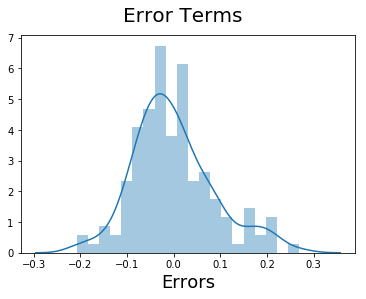

In [66]:
# Plot the histogram of the error terms
fig = plt.figure()
sns.distplot((y_train - y_train_pred), bins = 20)
fig.suptitle('Error Terms', fontsize = 20)                  # Plot heading 
plt.xlabel('Errors', fontsize = 18)   

error terms are normally distributed and mean is zero.

##  Making Predictions

#### Applying the scaling on the test sets

In [67]:
num_vars = ['symboling','wheelbase','doornumber','cylindernumber','carlength','carwidth','carheight','curbweight','enginesize','boreratio','stroke','compressionratio','horsepower','peakrpm','citympg','highwaympg','price']

df_test[num_vars] = scaler.transform(df_test[num_vars])


#### Dividing into X_test and y_test

In [68]:
y_test=df_test.pop('price')
x_test=df_test

In [69]:
# Now let's use our model to make predictions.


# Creating x_test_new dataframe by dropping variables from x_test
x_test_new = x_test[x_train_new10.columns]

# Adding a constant variable 
x_test_new = sm.add_constant(x_test_new)

In [71]:
# Making predictions
y_test_pred = lm.predict(x_test_new)

## Model Evaluation

In [72]:
# checking R-square on test set

from sklearn.metrics import r2_score

r2_score(y_true=y_test,y_pred=y_test_pred)

0.8460007326448564

the value of r-square for test set is quite close to what was obtained from training set. i.e the model is able to predict quite well for test data also.

Text(0, 0.5, 'y_test_pred')

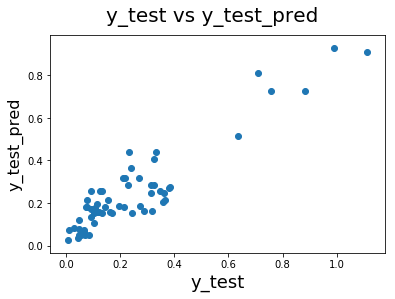

In [73]:
# plotting y_test and y_test_pred to understand the spread
fig=plt.figure()
plt.scatter(y_test,y_test_pred)
fig.suptitle('y_test vs y_test_pred', fontsize=20)
plt.xlabel('y_test', fontsize=18)
plt.ylabel('y_test_pred', fontsize=16)

 Overall we have a decent model, we can see that the equation of our best fitted line is:

### 𝑝𝑟𝑖𝑐𝑒=1.1361 X enginesize + 0.1949 X peakrpm + 0.2349 X CarCompany_bmw + 0.1762 X CarCompany_porsche + 0.1340 X fuelsystem_idi - 0.1586